In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Data_Train.csv')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops has  Null values.

In [9]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Route']=imp.fit_transform(df['Route'].values.reshape(-1,1))
df['Total_Stops']=imp.fit_transform(df['Total_Stops'].values.reshape(-1,1))

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

No Null Values.

In [11]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

we need to change string variable into numerical value.

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Airline']=le.fit_transform(df['Airline'])
df['Date_of_Journey']=le.fit_transform(df['Date_of_Journey'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Route']=le.fit_transform(df['Route'])
df['Dep_Time']=le.fit_transform(df['Dep_Time'])

df['Arrival_Time']=le.fit_transform(df['Arrival_Time'])
df['Duration']=le.fit_transform(df['Duration'])

df['Total_Stops']=le.fit_transform(df['Total_Stops'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])




In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302


In [14]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,23.735093,1.952261,1.436113,74.822896,107.980717,869.828419,194.069269,1.458111,7.393054,9087.064121
std,2.352155,12.337763,1.177221,1.474782,36.728405,61.085563,331.509504,108.620556,1.806290,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


skewness present in Destination,Route,Dep_Time,Total_stops.
outliers present Airline,Duration,Arrival_Time,Dep_Time and Route.

In [15]:
df_cor=df.corr()
df_cor

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022251,-0.013401,0.018479,0.025118,-0.039439,-0.015733,0.027917,0.036064,-0.060802,-0.039520
Date_of_Journey,0.022251,1.000000,0.167549,-0.273357,0.275181,-0.007836,-0.012507,-0.001168,-0.044152,0.008382,-0.036942
Source,-0.013401,0.167549,1.000000,-0.592574,0.403403,0.055191,0.020844,-0.192009,-0.225601,-0.022107,0.015998
Destination,0.018479,-0.273357,-0.592574,1.000000,-0.461183,-0.063608,-0.036830,0.022037,0.337883,0.026806,-0.071112
Route,0.025118,0.275181,0.403403,-0.461183,1.000000,-0.082051,0.010560,-0.062097,-0.437783,0.035188,0.164118
Dep_Time,-0.039439,-0.007836,0.055191,-0.063608,-0.082051,1.000000,-0.023294,0.041619,0.044687,-0.052853,0.002949
Arrival_Time,-0.015733,-0.012507,0.020844,-0.036830,0.010560,-0.023294,1.000000,0.027746,-0.097132,0.017505,0.027377
Duration,0.027917,-0.001168,-0.192009,0.022037,-0.062097,0.041619,0.027746,1.000000,0.175207,0.080151,-0.144270
Total_Stops,0.036064,-0.044152,-0.225601,0.337883,-0.437783,0.044687,-0.097132,0.175207,1.000000,0.164009,-0.571174
Additional_Info,-0.060802,0.008382,-0.022107,0.026806,0.035188,-0.052853,0.017505,0.080151,0.164009,1.000000,-0.065478


Price is highly correlate with Route.
Price is least correlate with Total_Stops.

<AxesSubplot:>

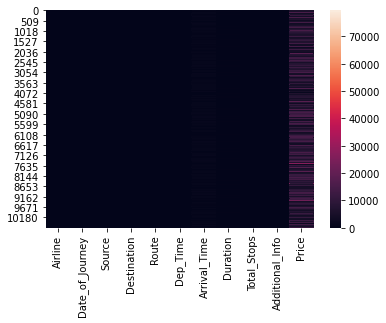

In [16]:
sns.heatmap(df)

No null values present.

<AxesSubplot:>

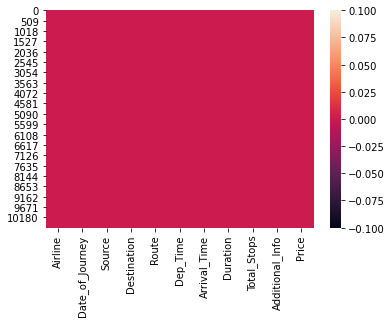

In [17]:
sns.heatmap(df.isnull())

No Null values present.

<AxesSubplot:>

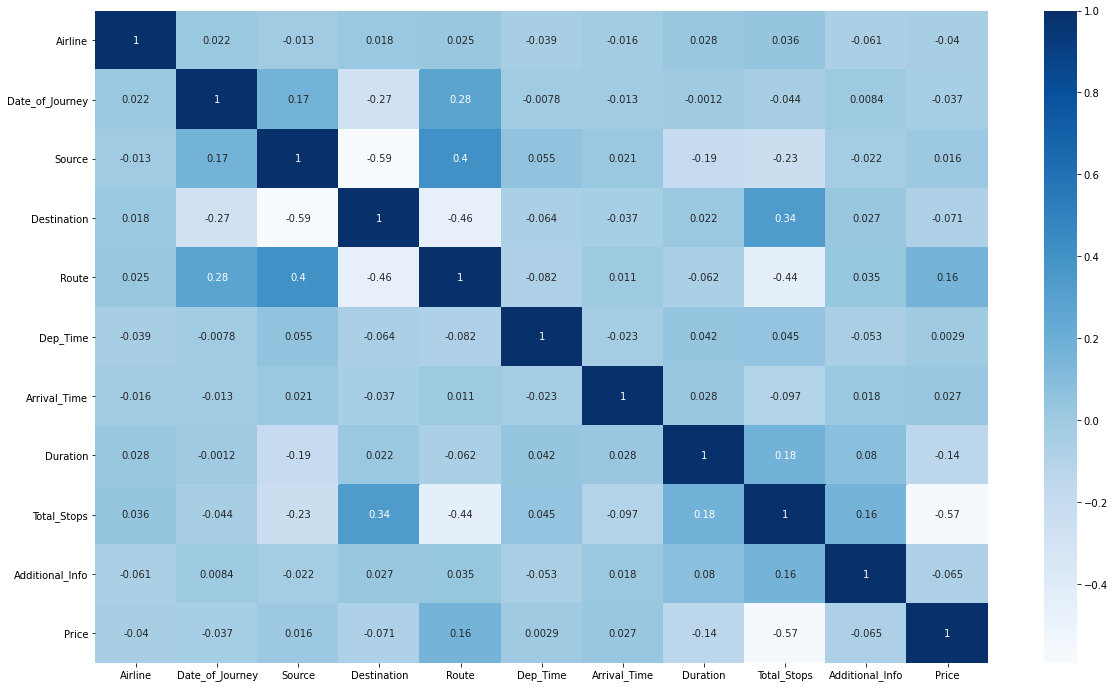

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='Blues',annot=True)

Price is highly correlate with Route.
Price is least correlate with Total_Stops.

<AxesSubplot:>

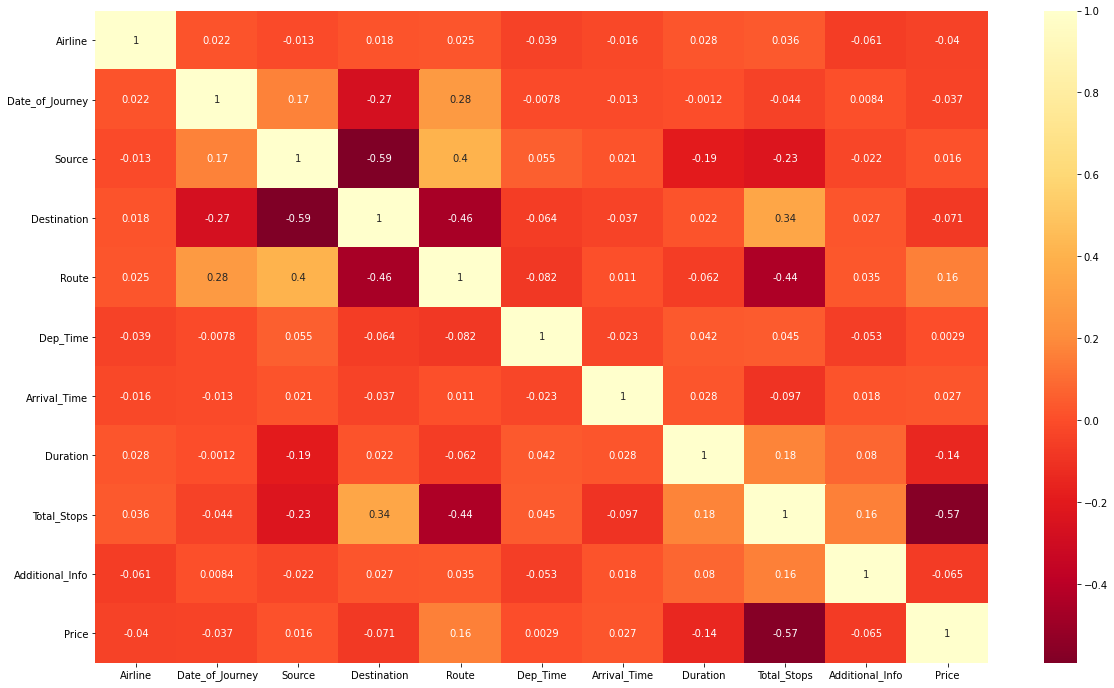

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

Price is highly correlate with Route.
Price is least correlate with Total_Stops.

In [20]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [21]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [22]:
df.drop('Source',axis=1,inplace=True)

In [23]:
df.drop('Destination',axis=1,inplace=True)

In [24]:
df.drop('Dep_Time',axis=1,inplace=True)

In [25]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
df.head()

,Airline,Route,Duration,Total_Stops,Additional_Info,Price
0,3,18,240,4,8,3897
1,1,84,336,1,8,7662
2,4,118,106,1,8,13882
3,3,91,311,0,8,6218
4,3,29,303,0,8,13302


<AxesSubplot:xlabel='Airline', ylabel='Density'>

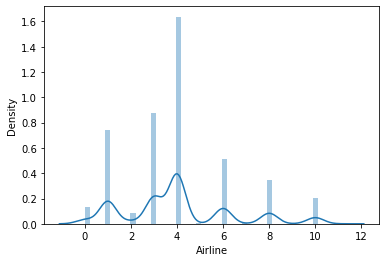

In [27]:
sns.distplot(df['Airline'])

skewness present.

<AxesSubplot:xlabel='Route', ylabel='Density'>

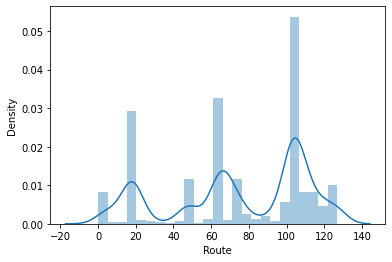

In [28]:
sns.distplot(df['Route'])

 skewness present.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

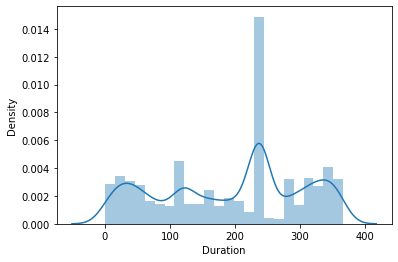

In [29]:
sns.distplot(df['Duration'])

skewness present.

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

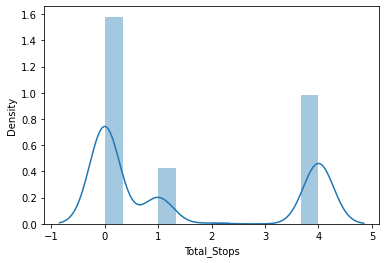

In [30]:
sns.distplot(df['Total_Stops'])

 skewness present.

<AxesSubplot:xlabel='Additional_Info', ylabel='Density'>

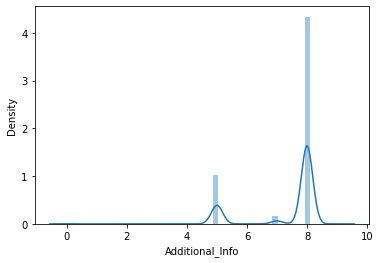

In [31]:
sns.distplot(df['Additional_Info'])

skewness present.

<AxesSubplot:xlabel='Price', ylabel='Density'>

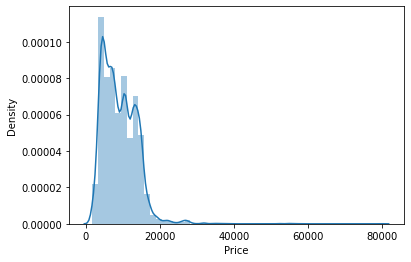

In [32]:
sns.distplot(df['Price'])

 skewness present.

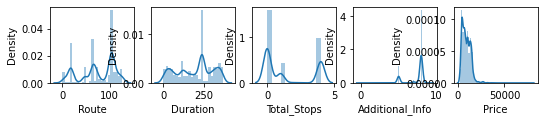

In [33]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [34]:
df.columns

Index(['Airline', 'Route', 'Duration', 'Total_Stops', 'Additional_Info',
       'Price'],
      dtype='object')

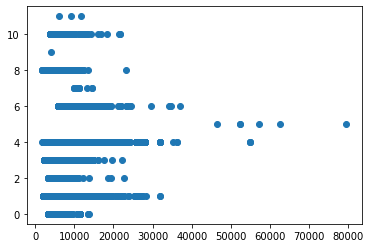

In [35]:
plt.scatter(df['Price'],df['Airline'])

Airline is defined from 0 to 10.

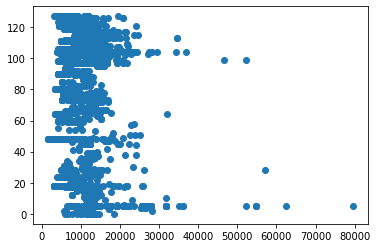

In [36]:
plt.scatter(df['Price'],df['Route'])

Route has a range from 0 to 120.it is spreaded mostly left part of the chart.

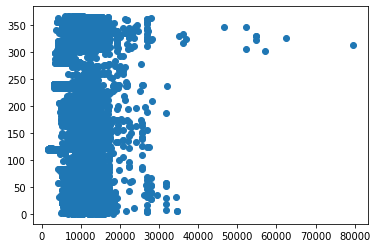

In [37]:
plt.scatter(df['Price'],df['Duration'])

Duration has a range from 0 to 350.it is mostly spreaded left side of a plot.

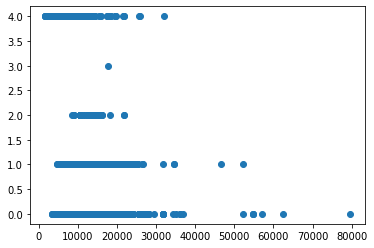

In [38]:
plt.scatter(df['Price'],df['Total_Stops'])

Total_Stops range from 0 to 4.

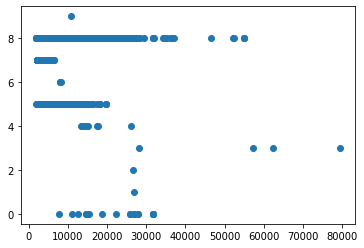

In [39]:
plt.scatter(df['Price'],df['Additional_Info'])

Additional_Info range from 0 to 8.

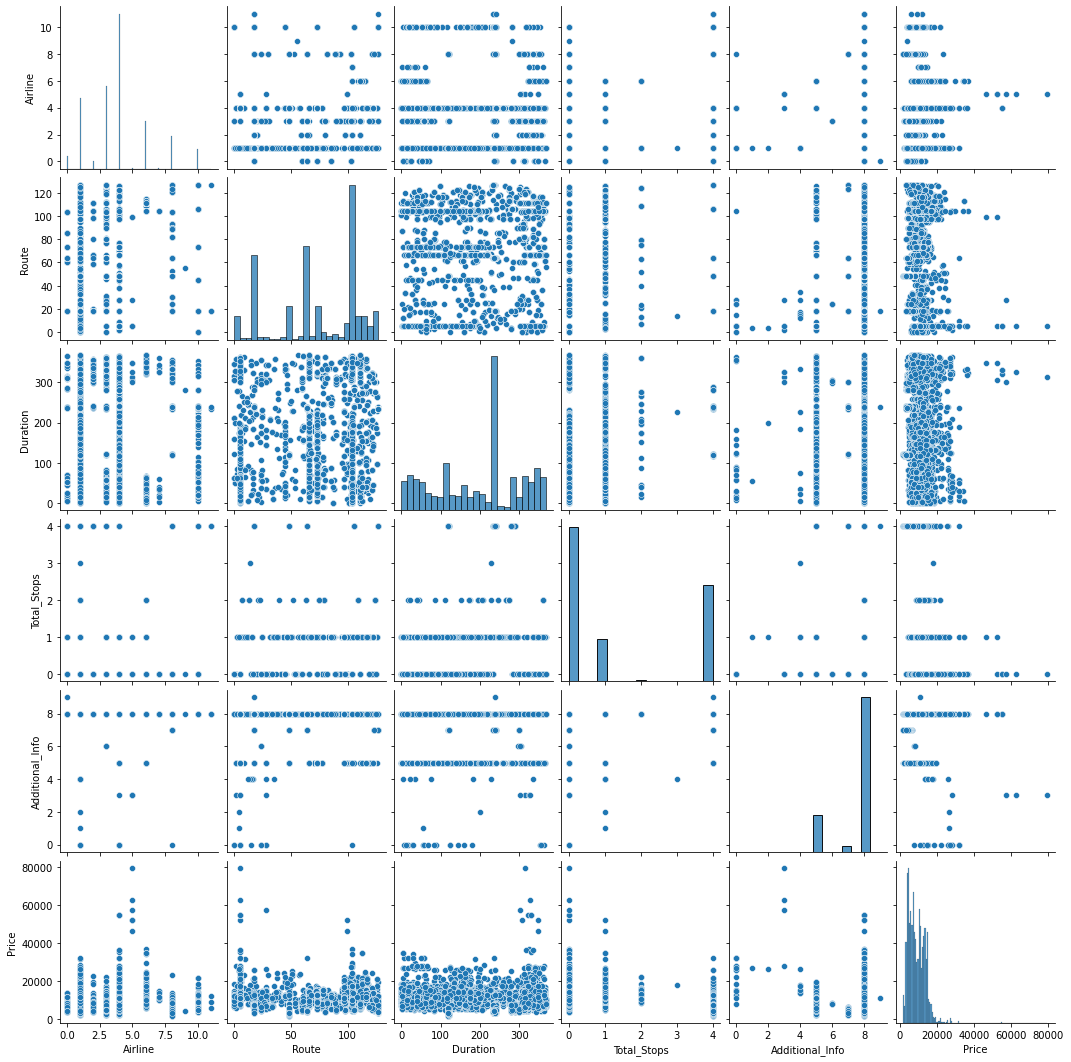

In [40]:
sns.pairplot(df)

In [41]:
df.skew()

Airline            0.731095
Route             -0.502066
Duration          -0.213427
Total_Stops        0.631681
Additional_Info   -1.779838
Price              1.812552
dtype: float64

all columns are object type so that  we will not remove skewness .

In [42]:
df.columns

Index(['Airline', 'Route', 'Duration', 'Total_Stops', 'Additional_Info',
       'Price'],
      dtype='object')

<AxesSubplot:>

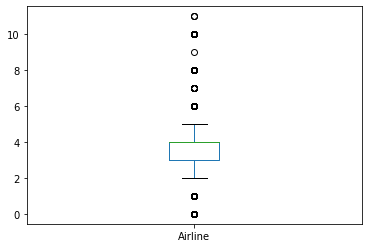

In [43]:
df['Airline'].plot.box()

 outliers present.

<AxesSubplot:>

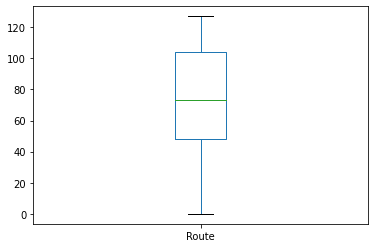

In [44]:
df['Route'].plot.box()

No outliers present.

<AxesSubplot:>

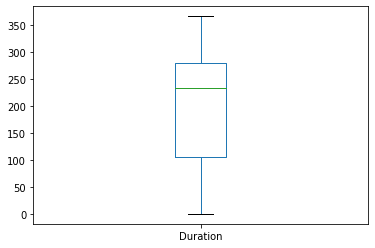

In [45]:
df['Duration'].plot.box()

No outliers present.

<AxesSubplot:>

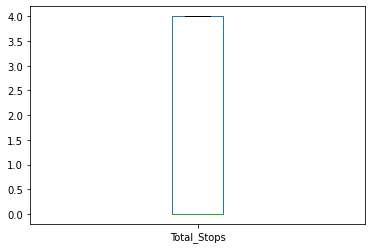

In [46]:
df['Total_Stops'].plot.box()

No outliers present.

<AxesSubplot:>

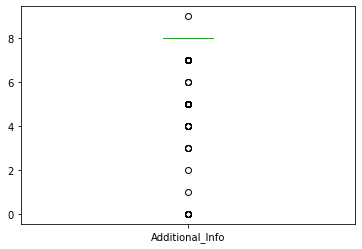

In [47]:
df['Additional_Info'].plot.box()

 outliers present.

<AxesSubplot:>

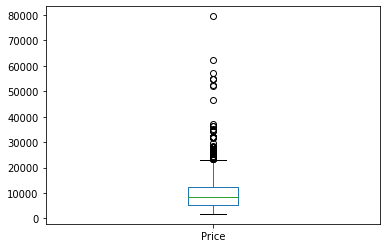

In [48]:
df['Price'].plot.box()

outliers present.

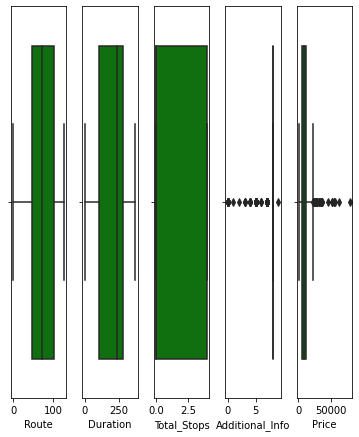

In [49]:
collist=df.columns.values
ncol=12
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Outliers present in Additional_Info.

In [50]:
df.columns

Index(['Airline', 'Route', 'Duration', 'Total_Stops', 'Additional_Info',
       'Price'],
      dtype='object')

In [51]:
df.dtypes

Airline            int32
Route              int32
Duration           int32
Total_Stops        int32
Additional_Info    int32
Price              int64
dtype: object

# Removing Outliers

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
         826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
        1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
        2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
        2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
        3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
        4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
        5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
        6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
        7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
        8957,  8990,  9019,  9019,  9193,  9239,  9632,  9657,  9715,
        9974, 10052, 10113, 10160, 10182, 10189, 10353, 10364, 10364,
       10383, 10439, 10511, 10511], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5,

In [53]:
z[123][5]

3.9779582952974644

In [54]:
z[396][5]

6.049678757319163

In [55]:
df1=df[(z<3).all(axis=1)]

In [56]:
df1.shape

(10578, 6)

In [57]:
df.shape

(10683, 6)

10683-10578=105 outliers are removed from Dataframe.

In [58]:
df.head()

,Airline,Route,Duration,Total_Stops,Additional_Info,Price
0,3,18,240,4,8,3897
1,1,84,336,1,8,7662
2,4,118,106,1,8,13882
3,3,91,311,0,8,6218
4,3,29,303,0,8,13302


In [59]:
x=df.iloc[:,0:-1]
y=df.iloc[:,5]



In [60]:
x

,Airline,Route,Duration,Total_Stops,Additional_Info
0,3,18,240,4,8
1,1,84,336,1,8
2,4,118,106,1,8
3,3,91,311,0,8
4,3,29,303,0,8
...,...,...,...,...,...
10678,0,64,236,4,8
10679,1,64,237,4,8
10680,4,18,280,4,8
10681,10,18,238,4,8


In [61]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [62]:
def get_score(model):

    max_i=0
    max_score=0


    for i in range(1,200):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        acc= r2_score(y_test,pred)
        #print("accuracy score",acc)

        if(acc > max_score):
            max_score=acc
            max_i=i
    print("max score",max_score)
    print("max i",max_i)
    print("mean squared error",mean_squared_error(y_test,pred))
    print("mean absolute error",mean_absolute_error(y_test,pred))
    print("rootmean squared error",np.sqrt(mean_squared_error(y_test,pred)))


In [63]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lr=LinearRegression()
get_score(lr)

max score 0.38721036271784415
max i 192
mean squared error 15714149.774495687
mean absolute error 2698.1482797635617
rootmean squared error 3964.1076895684464


In [64]:
lr.coef_

array([   -4.53064838,   -12.97515958,    -2.11089258, -1553.09215167,
         125.67437871])

In [65]:
lr.intercept_

11790.572755837948

# Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=7)   
print(score)
print(score.mean(),score.std())

[0.33477456 0.32385097 0.3846603  0.3312501  0.35364473 0.34038386
 0.30328512]
0.33883566341027016 0.02355546143158464


# Ensemble Techniques

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=44)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.7054271748323839
5841947.1021662755


In [68]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor(n_estimators=100,random_state=44)
ab.fit(x_train,y_train)
predrf=ab.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.1785851893582424
16290239.501809346


# Regularization:L1 and L2 Regularization

In [69]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.335324420465286

In [70]:
from sklearn.linear_model import Lasso,Ridge
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.33532442046528665

In [71]:
from sklearn.linear_model import ElasticNet
et=ElasticNet(alpha=.0001)
et.fit(x_train,y_train)
pred=et.predict(x_test)
print(et.score(x_train,y_train))
et.coef_

0.3353244203362896


array([  -35.54880387,   -14.59782713,    -2.26397536, -1597.31380011,
         203.58069939])

# Saving the model

In [72]:
import joblib
joblib.dump(lr,'flight.obj')

['flight.obj']

In [73]:
file=joblib.load('flight.obj')
file.predict(x_test)

array([11483.24563878, 10686.01213386, 11256.55349689, ...,
       11747.80753154, 11282.15928123, 11063.24417931])